MELİKE ÇEKEN Y235052017 YAPAY ZEKA ODEV 1

PROBLEM

Kullanılan veri seti arabaların özellikleri ve fiyatlarını içeren, kaggle üzerinden almış olduğum public "Logistic Regression_carsprice" veri setidir. Burada problem araba fiyatlarının belirli özelliklerle nasıl bir değişim göstereceğini tahmin etmek, anlamaktır. Örneğin, symboling değeri arabanın sigorta risk seviyesidir. +3 otomobilin yüksek riski oldunu söylerken, -3 riskin az olduğunu gösterir. Son özellik olan price ise tahmin etmek istediğimiz değişkendir. Çalışmanın ilk aşaması olan EDA tamamlandıktan sonra makine öğrenmesi modeline geçilebilir.

Veri seti linki: https://www.kaggle.com/datasets/jenisam/logistic-regression-carsprice

Veri Setinin Tanınması

In [ ]:
car_ID               araba id
symboling            sigorta risk düzeyi
carCompany           araba şirketi
fueltype             yakıt tipi
aspiration           asprasyon
doornumber           kapı sayısı
carbody              araç gövdesi
drivewheel           tahrik tekerleği
enginelocation       motor konumu
wheelbase            dingil mesafesi
carlength            araba uzunluğu
carwidth             araba genişliği
carheight            araba yüksekliği
curbweight           boş ağırlık
enginetype           motor tipi
cylindernumber       silindir sayısı
enginesize           motor boyutu
fuelsystem           yakıt sistemi
boreratio            çap-strok oranı
stroke               strok
compressionratio     sıkıştırma oranı
horsepower           beygir gücü
peakrpm              dakika başına en fazla devir
citympg              şehir mpg
highwaympg           otoyol mpg
price                fiyat

# Veri Setini Anlamak

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

Gerekli kütüphaneler import edilmiştir.

In [3]:
df=pd.read_csv("data/carPrice.csv")

Kullanacağımış veri seti import edilmiştir.

In [3]:
df

,car_ID,symboling,carCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
df.tail(10)

,car_ID,symboling,carCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
195,196,-1,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415.0
196,197,-2,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985.0
197,198,-1,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515.0
198,199,-2,volvo,gas,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420.0
199,200,-1,volvo,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950.0
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


Veri setinin son 10 satırı göüntülendi.

In [5]:
df.columns

Index(['car_ID', 'symboling', 'carCompany', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

Veri sütünları görüntülenmiştir.

In [6]:
df.dtypes

car_ID                int64
symboling             int64
carCompany           object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

Veri datatypelari görüntülenmiştir. 

In [7]:
df.index

RangeIndex(start=0, stop=205, step=1)

In [8]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Sayısal verilere sahip olan sütunların max, min , std gibi istatiksel değerleri görüntülenmiştir.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   carCompany        205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [10]:
df.shape

(205, 26)

Veri seti kaç satır ve sütundan oluştuğu gözlemlenmiştir.

In [11]:
df["car_ID"]

0        1
1        2
2        3
3        4
4        5
      ... 
200    201
201    202
202    203
203    204
204    205
Name: car_ID, Length: 205, dtype: int64

In [12]:
df["symboling"]

0      3
1      3
2      1
3      2
4      2
      ..
200   -1
201   -1
202   -1
203   -1
204   -1
Name: symboling, Length: 205, dtype: int64

Symboling niteliği görüntülenmiştir. Datatypei integerdır. Bu nitelik arabanın sigorta risk seviyesini temsil eder. Değer aralığı -3 ve +3 aralığıdır.

In [13]:
df["carCompany"]

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: carCompany, Length: 205, dtype: object

carCompany niteliği görüntülenmiştir. Datatypei objeckttir. Bu nitelik araba şirketlerini temsil eder. BU şirketler alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda','isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury','mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault','saab', 'subaru', 'toyota', 'volkswagen', 'volvo'dur.

In [14]:
df["fueltype"]

0         gas
1         gas
2         gas
3         gas
4         gas
        ...  
200       gas
201       gas
202       gas
203    diesel
204       gas
Name: fueltype, Length: 205, dtype: object

fueltype niteliği görüntülenmiştir. Datatypei objeckttir. Bu nitelik yakıt tipini temsil eder. Yakıt tipleri 'gas' ve 'diesel'dir.

In [15]:
df["aspiration"]

0        std
1        std
2        std
3        std
4        std
       ...  
200      std
201    turbo
202      std
203    turbo
204    turbo
Name: aspiration, Length: 205, dtype: object

aspiration niteliği görüntülenmiştir. Datatypei objeckttir. Bu nitelikler 'std', 'turbo'dur.

In [16]:
df["doornumber"]

0       two
1       two
2       two
3      four
4      four
       ... 
200    four
201    four
202    four
203    four
204    four
Name: doornumber, Length: 205, dtype: object

doornumber niteliği görüntülenmiştir. Datatypei objeckttir. Aracın kaç kapılı olduğunu ifade eden bu nitelikler 'two', 'four'dur.

In [17]:
df["carbody"]

0      convertible
1      convertible
2        hatchback
3            sedan
4            sedan
          ...     
200          sedan
201          sedan
202          sedan
203          sedan
204          sedan
Name: carbody, Length: 205, dtype: object

carbody niteliği görüntülenmiştir. Datatypei objeckttir. Araç göde tipini temsil eden bu nitelikler 'convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'dur.

In [18]:
df["drivewheel"]

0      rwd
1      rwd
2      rwd
3      fwd
4      4wd
      ... 
200    rwd
201    rwd
202    rwd
203    rwd
204    rwd
Name: drivewheel, Length: 205, dtype: object

drivewheel niteliği görüntülenmiştir. Datatypei objeckttir. Tahrik tekerleğini temsil eden bu nitelikler 'convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'dur.

In [19]:
df["enginelocation"]

0      front
1      front
2      front
3      front
4      front
       ...  
200    front
201    front
202    front
203    front
204    front
Name: enginelocation, Length: 205, dtype: object

enginelocation niteliği görüntülenmiştir. Datatypei objeckttir. Motor yerini temsil eden bu nitelikler 'front', 'rear'dır.

In [20]:
df["wheelbase"]

0       88.6
1       88.6
2       94.5
3       99.8
4       99.4
       ...  
200    109.1
201    109.1
202    109.1
203    109.1
204    109.1
Name: wheelbase, Length: 205, dtype: float64

wheelbase niteliği görüntülenmiştir. Datatypei floattur. Ön tekerlek merkezi ile arka tekerlek merkezi arasındaki yatay uzaklıktır.

In [21]:
df["carlength"]

0      168.8
1      168.8
2      171.2
3      176.6
4      176.6
       ...  
200    188.8
201    188.8
202    188.8
203    188.8
204    188.8
Name: carlength, Length: 205, dtype: float64

carlength niteliği görüntülenmiştir. Datatypei floattur. Araba uzunluğunu temsil etmektedir.

In [22]:
df["carwidth"]

0      64.1
1      64.1
2      65.5
3      66.2
4      66.4
       ... 
200    68.9
201    68.8
202    68.9
203    68.9
204    68.9
Name: carwidth, Length: 205, dtype: float64

carwidth niteliği görüntülenmiştir. Datatypei floattur. Araba genişliğini temsil etmektedir.

In [23]:
df["carheight"]

0      48.8
1      48.8
2      52.4
3      54.3
4      54.3
       ... 
200    55.5
201    55.5
202    55.5
203    55.5
204    55.5
Name: carheight, Length: 205, dtype: float64

carheight niteliği görüntülenmiştir. Datatypei floattur. Araba yükseklğini temsil etmektedir.

In [24]:
df["curbweight"]

0      2548
1      2548
2      2823
3      2337
4      2824
       ... 
200    2952
201    3049
202    3012
203    3217
204    3062
Name: curbweight, Length: 205, dtype: int64

curbweight niteliği görüntülenmiştir. Datatypei integerdır. Arabanın boş ağırlığını temsil eder. Boş ağırlık aracın standart donanımla geçerli olan ağırlığıdır.

In [25]:
df["enginetype"]

0      dohc
1      dohc
2      ohcv
3       ohc
4       ohc
       ... 
200     ohc
201     ohc
202    ohcv
203     ohc
204     ohc
Name: enginetype, Length: 205, dtype: object

enginetype niteliği görüntülenmiştir. Datatypei objeckttir. Motor tipini temsil eden bu nitelikler 'dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'dir.

In [26]:
df["cylindernumber"]

0      four
1      four
2       six
3      four
4      five
       ... 
200    four
201    four
202     six
203     six
204    four
Name: cylindernumber, Length: 205, dtype: object

cylindernumber niteliği görüntülenmiştir. Datatypei objeckttir. Silindir sayısını temsil eden bu nitelikler 'four', 'six', 'five', 'three', 'twelve', 'two', 'eight'tir. 

In [27]:
df["enginesize"]

0      130
1      130
2      152
3      109
4      136
      ... 
200    141
201    141
202    173
203    145
204    141
Name: enginesize, Length: 205, dtype: int64

enginesize niteliği görüntülenmiştir. Datatypei integerdır. Motor boyutunu temsil eder.

In [28]:
df["fuelsystem"]

0      mpfi
1      mpfi
2      mpfi
3      mpfi
4      mpfi
       ... 
200    mpfi
201    mpfi
202    mpfi
203     idi
204    mpfi
Name: fuelsystem, Length: 205, dtype: object

fuelsystem niteliği görüntülenmiştir. Datatypei objeckttir. Yakıt sistemini temsil eden bu nitelikler 'mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'dir.

In [29]:
df["boreratio"]

0      3.47
1      3.47
2      2.68
3      3.19
4      3.19
       ... 
200    3.78
201    3.78
202    3.58
203    3.01
204    3.78
Name: boreratio, Length: 205, dtype: float64

boreratio niteliği görüntülenmiştir. Datatypei floattur. Çap-strok oranını temsil etmektedir.

In [30]:
df["stroke"]

0      2.68
1      2.68
2      3.47
3      3.40
4      3.40
       ... 
200    3.15
201    3.15
202    2.87
203    3.40
204    3.15
Name: stroke, Length: 205, dtype: float64

stroke niteliği görüntülenmiştir. Datatypei floattur.

In [31]:
df["compressionratio"]

0       9.0
1       9.0
2       9.0
3      10.0
4       8.0
       ... 
200     9.5
201     8.7
202     8.8
203    23.0
204     9.5
Name: compressionratio, Length: 205, dtype: float64

compressionratio niteliği görüntülenmiştir. Datatypei floattur.

In [32]:
df["horsepower"]

0      111
1      111
2      154
3      102
4      115
      ... 
200    114
201    160
202    134
203    106
204    114
Name: horsepower, Length: 205, dtype: int64

horsepower niteliği görüntülenmiştir. Datatypei integerdir. Aracın beygir gücünü temsil eder. 

In [34]:
df["peakrpm"]

0      5000
1      5000
2      5000
3      5500
4      5500
       ... 
200    5400
201    5300
202    5500
203    4800
204    5400
Name: peakrpm, Length: 205, dtype: int64

peakrpm niteliği görüntülenmiştir. Datatypei integerdir. Dakika başına en fazla deviri temsil eder. 

In [35]:
df["citympg"]

0      21
1      21
2      19
3      24
4      18
       ..
200    23
201    19
202    18
203    26
204    19
Name: citympg, Length: 205, dtype: int64

citympg niteliği görüntülenmiştir. Datatypei integerdir. Bir aracın şehir koşullarında ortalama olarak düşük hızlarda durup kalkarak alacağı puanı temsil eder.

In [36]:
df["highwaympg"]

0      27
1      27
2      26
3      30
4      22
       ..
200    28
201    25
202    23
203    27
204    25
Name: highwaympg, Length: 205, dtype: int64

highwaympg niteliği görüntülenmiştir. Datatypei integerdir. Bir arabanın açık bir yol üzerinde durmadan veya kalkmadan, genellikle daha yüksek bir hızda sürerken elde edeceği ortalama değerdir. 

In [37]:
df["price"]

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

price niteliği görüntülenmiştir. Datatypei floattur. Arbaları fiyatlarını temsil eder.

In [38]:
df[["carCompany","price"]].groupby(["carCompany"],as_index="False").mean().sort_values(by="price",ascending=True)

,price
carCompany,
chevrolet,6007.000000
dodge,7875.444444
plymouth,7963.428571
honda,8184.692308
subaru,8541.250000
isuzu,8916.500000
mitsubishi,9239.769231
renault,9595.000000
toyota,9885.812500


Araba şirketleri ile fiyatlandırma arsındaki (carCompany - price) ilişkiyi görmek için groupby ile gruplanmıştır. Ortlama olarak chevrolet 6007.000000 ile en az fiyatlandırmaya sahip iken jaguar 34600.000000 en çok fiyatlandırmaya sahiptir. 

In [39]:
df[["fueltype","price"]].groupby(["fueltype"],as_index="False").mean().sort_values(by="price",ascending=True)

,price
fueltype,
gas,12999.7982
diesel,15838.1500


Yakıt tipi ile fiyatlandırma arasındaki (fueltype - price) ilişkiyi görmek için groupby ile gruplanmıştır. Ortalama olarak 'gas' yakıt tipine sahip olan araçların fiyatı, 'diesel' yakıt tipine sahip olan araçların fiyatına göre daha azdır. 

In [41]:
df[["doornumber","price"]].groupby(["doornumber"],as_index="False").mean().sort_values(by="price",ascending=True)

,price
doornumber,
two,12989.924078
four,13501.152174


Araba kapı sayısı ile fiyatlandırma arasındaki (doornumber - price) ilişkiyi görmek için groupby ile gruplanmıştır. Ortalama olarak iki kapılı arabaların ortalama fiyatı 12989.924078 iken dört kapılı arabaların ortalama fiyatı 13501.152174 olarak görüntülenmiştir. 

In [42]:
df[["enginelocation","price"]].groupby(["enginelocation"],as_index="False").mean().sort_values(by="price",ascending=True)

,price
enginelocation,
front,12961.097361
rear,34528.000000


Motor konumu ile fiyatlandırma arasındaki (enginelocation - price) ilişkiyi görmek için groupby ile gruplanmıştır. Ortalama olarak motor konumu ön (front) olan araçların ortalama fiyatı 12961.097361 iken motor konumu arka (rear) olan araçların ortalama fiyatı 34528.000000 olduğu gözlemlenmiştir. 

In [43]:
df[["enginetype","price"]].groupby(["enginetype"],as_index="False").mean().sort_values(by="price",ascending=True)

,price
enginetype,
ohc,11574.048426
rotor,13020.000000
ohcf,13738.600000
l,14627.583333
dohc,18116.416667
ohcv,25098.384615
dohcv,31400.500000


Motor konumu ile fiyatlandırma arasındaki (enginelocation - price) ilişkiyi görmek için groupby ile gruplanmıştır. Ortalama olarak motor konumu ön (front) olan araçların ortalama fiyatı 12961.097361 iken motor konumu arka (rear) olan araçların ortalama fiyatı 34528.000000 olduğu gözlemlenmiştir.

In [44]:
df[["fuelsystem","price"]].groupby(["fuelsystem"],as_index="False").mean().sort_values(by="price",ascending=True)

,price
fuelsystem,
2bbl,7478.151515
1bbl,7555.545455
spdi,10990.444444
spfi,11048.000000
4bbl,12145.000000
mfi,12964.000000
idi,15838.150000
mpfi,17754.602840


Yakıt sistemi ile fiyatlandırma arasındaki (fuelsystem	 - price) ilişkiyi görmek için groupby ile gruplanmıştır. Ortalama olarak yakıt tipi 2bbl olan araçların ortalama fiyatı 7478.151515 iken yakıt tipi mpfi  olan araçların ortalama fiyatı 17754.602840 olarak en yüksek görüntülenmiştir.

# Kayıp Değerler

In [45]:
df.isnull()

,car_ID,symboling,carCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Veri setinde kayıp değer var mı yok  mu kontrolü yapılmıştır. 

In [46]:
df.isnull().sum()

car_ID              0
symboling           0
carCompany          0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [47]:
pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/len(df)], 
            axis=1).rename(columns={0:'Missing Records', 1:'Percentage (%)'})

,Missing Records,Percentage (%)
car_ID,0,0.0
symboling,0,0.0
carCompany,0,0.0
fueltype,0,0.0
aspiration,0,0.0
doornumber,0,0.0
carbody,0,0.0
drivewheel,0,0.0
enginelocation,0,0.0
wheelbase,0,0.0


Veri setimizde kayıp değer yoktur. Eğer olsaydı uygun koşullarda doldurulabilir ya da veri setinden kaldırılabilirdi.

# Kategorik Verilerin Nümerik Verilere Dönüşümü

Veri setlerinde kategorik verilerin bulunmaması gerekmektedir. Bu nedenle kategorik veriler nümerik verilere çevrilir.

In [48]:
df.shape

(205, 26)

In [49]:
df.dtypes

car_ID                int64
symboling             int64
carCompany           object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

Veri tiplerini bakıldığında carCompany, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, enginetype, cylindernumber ve fuelsystem öğelerinin nümerik verilere çevrilmesi gerekir.

In [50]:
df["carCompany"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [51]:
df["fueltype"].unique()

array(['gas', 'diesel'], dtype=object)

In [52]:
df["aspiration"].unique()

array(['std', 'turbo'], dtype=object)

In [53]:
df["doornumber"].unique()

array(['two', 'four'], dtype=object)

In [54]:
df["doornumber"].unique()

array(['two', 'four'], dtype=object)

In [55]:
df["carbody"].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [56]:
df["drivewheel"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [57]:
df["enginelocation"].unique()

array(['front', 'rear'], dtype=object)

In [58]:
df["enginetype"].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [59]:
df["cylindernumber"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

Kategorik olan değerlerin unique değerleri incelenmiştir.

In [9]:
df2= df.copy()
cols = ['fueltype','carCompany','aspiration','doornumber','carbody','drivewheel',
        'enginelocation','enginetype','cylindernumber','fuelsystem']
df3 = pd.concat([df2, pd.get_dummies(df2[cols])], axis=1).drop(cols, axis = 1)

In [10]:
df3.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


Kategorik verileri nümerik verilere çevirirken, birbirlerine üstünlük kurmamaları adına one hot encoding (get dummies) yöntemi kullanılmıştır. 

# AYKIRI DEĞERLERLE İŞLEMLER

Bir veri setinde daha iyi ve doğru sonuçlar elde etmek için aykırı değerleri ayıklamamız gerekmektedir. 

<Axes: ylabel='wheelbase'>

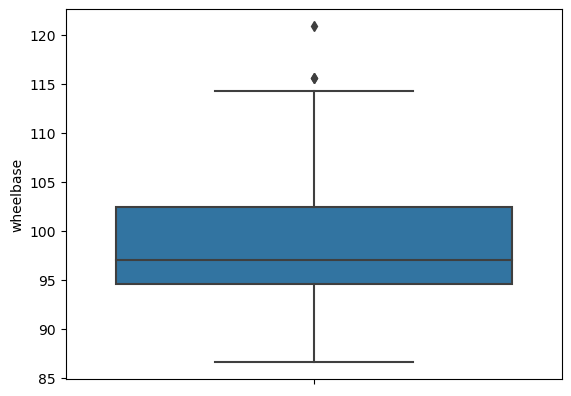

In [63]:
sns.boxplot(y= "wheelbase", data=df)

<Axes: ylabel='curbweight'>

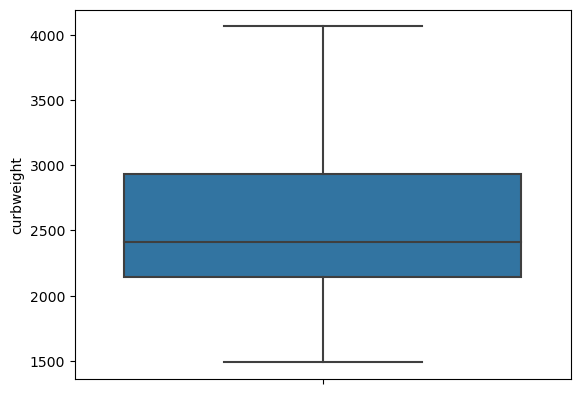

In [64]:
sns.boxplot(y= "curbweight", data=df)

<Axes: ylabel='enginesize'>

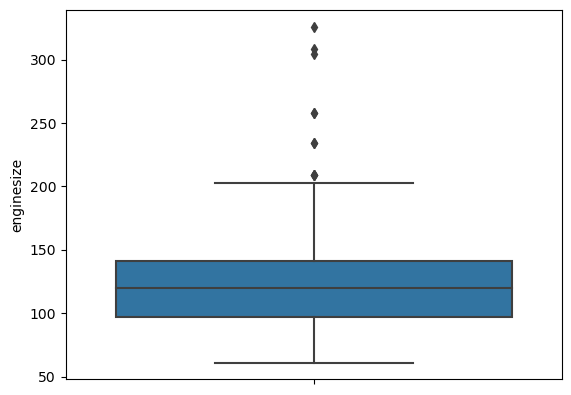

In [65]:
sns.boxplot(y= "enginesize", data=df)

<Axes: ylabel='horsepower'>

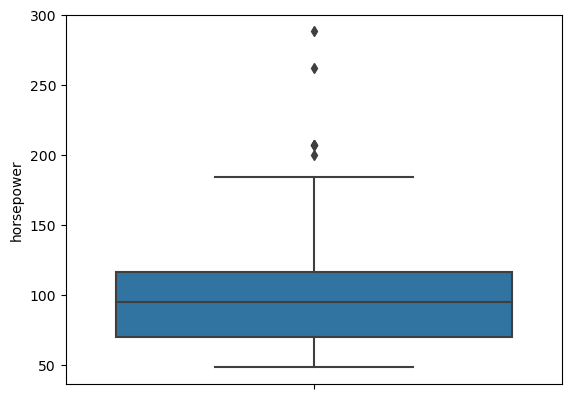

In [66]:
sns.boxplot(y= "horsepower", data=df)

<Axes: ylabel='citympg'>

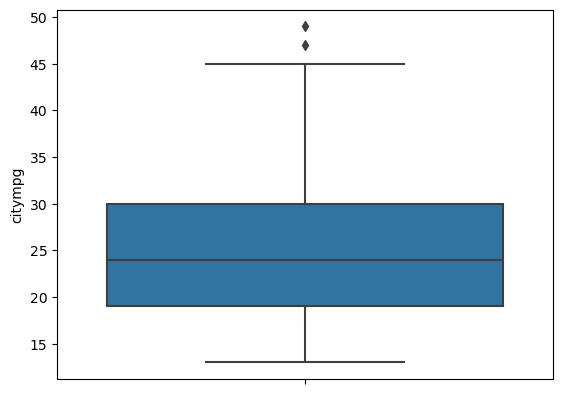

In [67]:
sns.boxplot(y= "citympg", data=df)

<Axes: ylabel='highwaympg'>

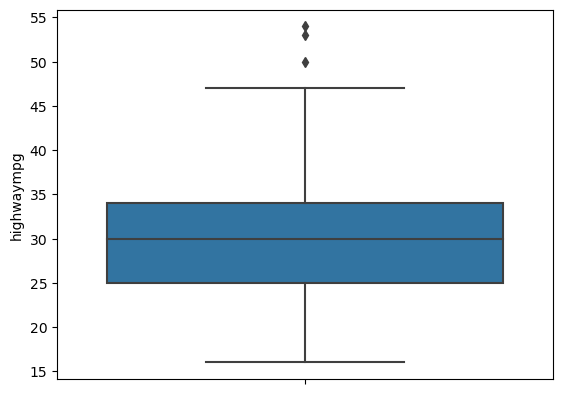

In [68]:
sns.boxplot(y= "highwaympg", data=df)

<Axes: ylabel='price'>

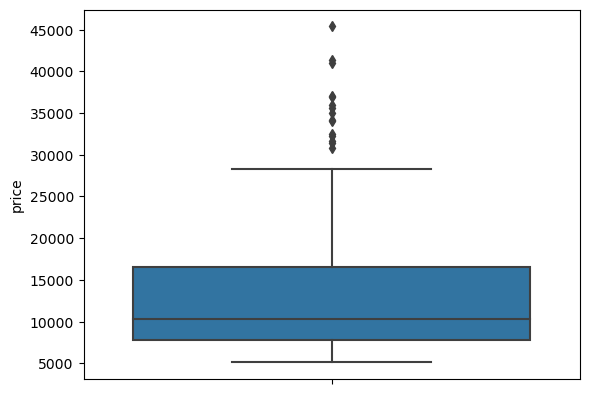

In [69]:
sns.boxplot(y= "price", data=df)

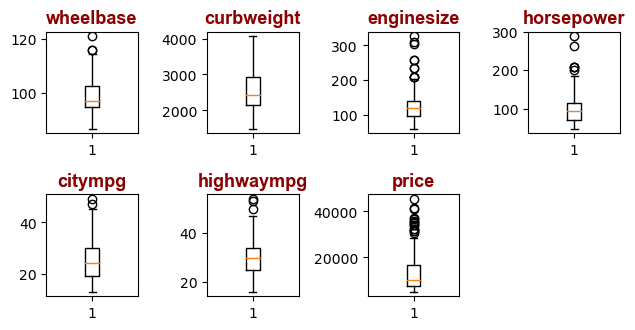

In [77]:
fill_list=['wheelbase','curbweight','enginesize','horsepower','citympg','highwaympg','price']
for i,col in enumerate(fill_list):
    plt.subplot(3,4,i+1)
    plt.boxplot(col, data=df)
    plt.title(col,fontdict=baslik_font)
plt.tight_layout()
plt.show()

Aykırı değerlere sahip olan nitelikler gösterilmiştir. 

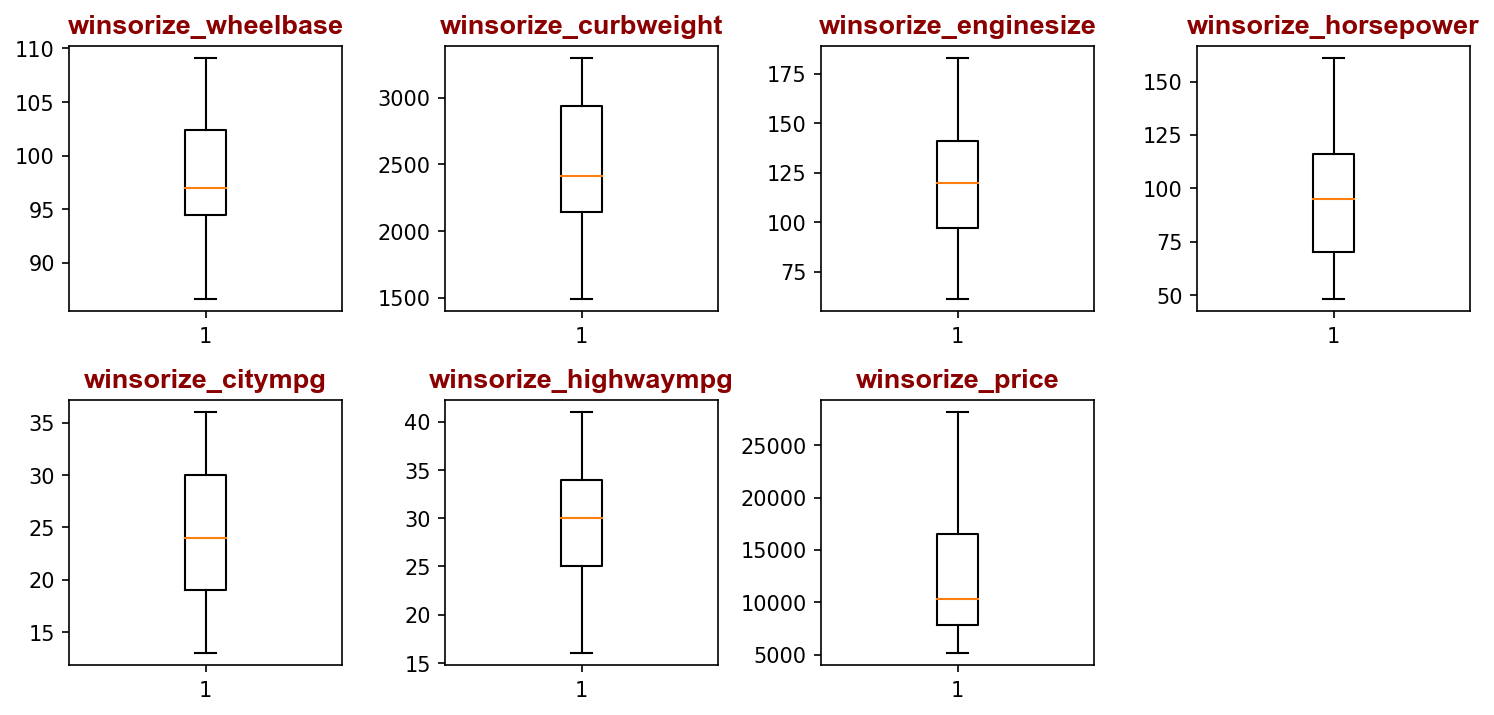

In [78]:
from scipy.stats.mstats import winsorize
dfw=pd.DataFrame()
for col in fill_list:
    dfw['winsorize_%s'%col]=winsorize(df[col],(0,0.08))
plt.figure(figsize=(10,7),dpi=150)
for i,col in enumerate(dfw.columns):
    plt.subplot(3,4,i+1)
    plt.boxplot(col, data=dfw)
    plt.title(col,fontdict=baslik_font)
plt.tight_layout()
plt.show()

Aykırı değerlere sahip olan nitelikler düzenlenmiştir.

# Veri Görselleştirme

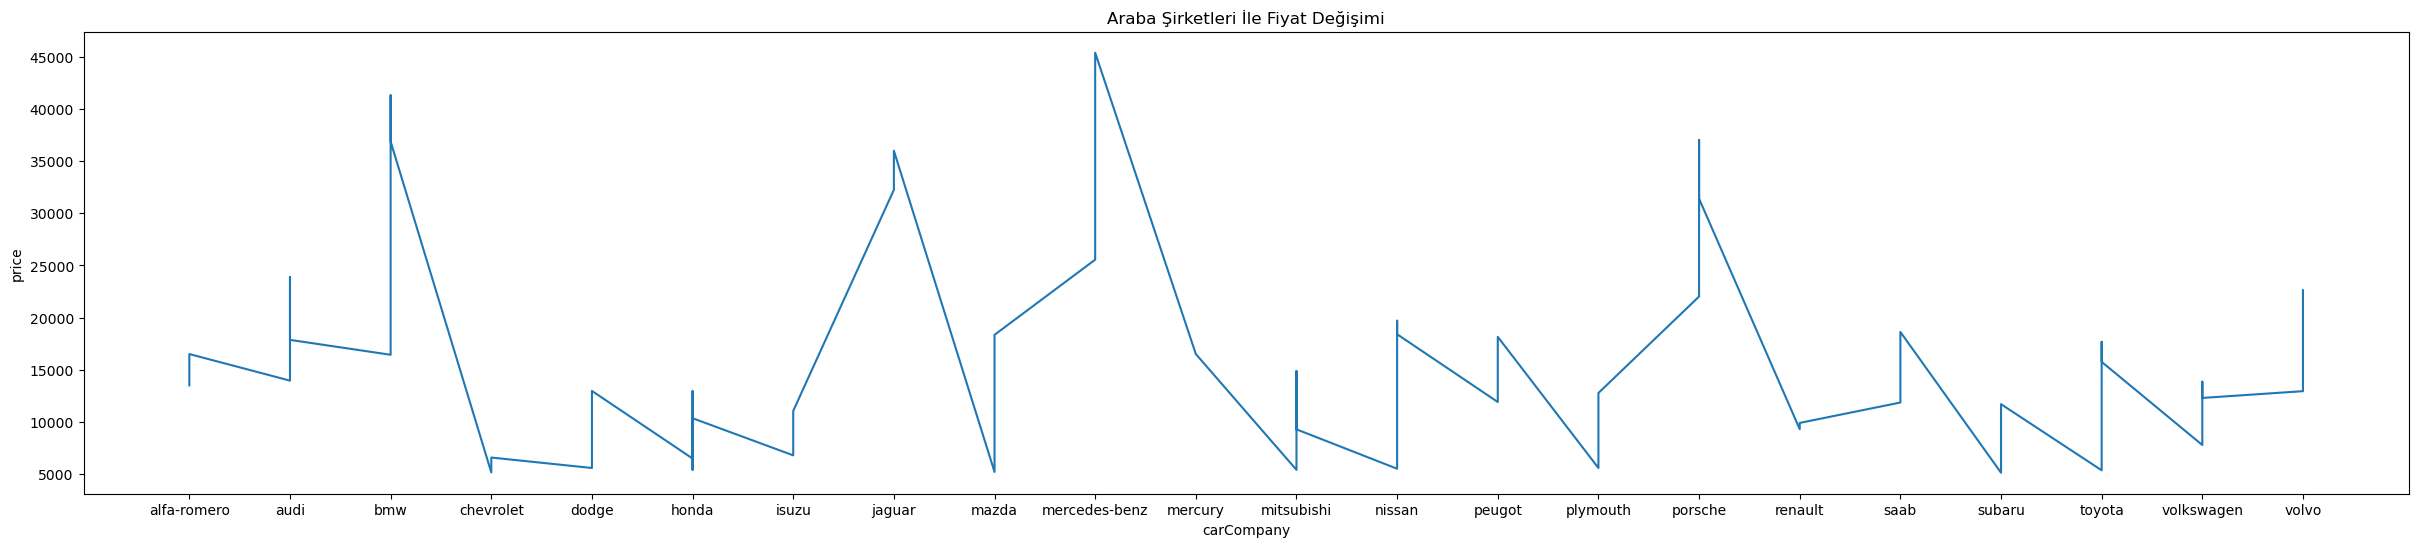

In [115]:
plt.figure(figsize=(30,6))

plt.plot(df.carCompany,df.price)

plt.title("Araba Şirketleri İle Fiyat Değişimi")

plt.xlabel("carCompany")
plt.ylabel("price")
plt.show()

Araba şirketlerinin fiyat değişimine etkisini gösteren bir görselleştirme işlemi yapılmıştır.

<Axes: xlabel='price', ylabel='carCompany'>

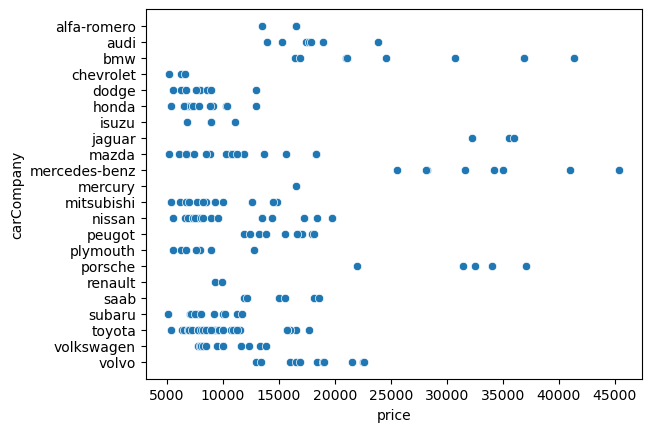

In [80]:
sns.scatterplot(x="price", y="carCompany", data=df)

carcompany ile price değişkeni arasındaki bağlantıya görüntülemek için serpilme diyagram çizilmiştir. Bu diyagrama göre 45000 ile mercedes-benz en yüksek fiyata sahiptir. Jaguar dışında 25000 altı fiyata araba bulmak mümkündür. Mazda markasında ortalama 20000 fiyat üstü araba yoktur. Porsche'nin en ucuz aracı 20000-25000 arasındadır. Chevrolet araların fiyatları 5000-10000 arasındadır. Renault arabaların en pahalısının fiyatı 10000dir. 

<Axes: xlabel='price', ylabel='carCompany'>

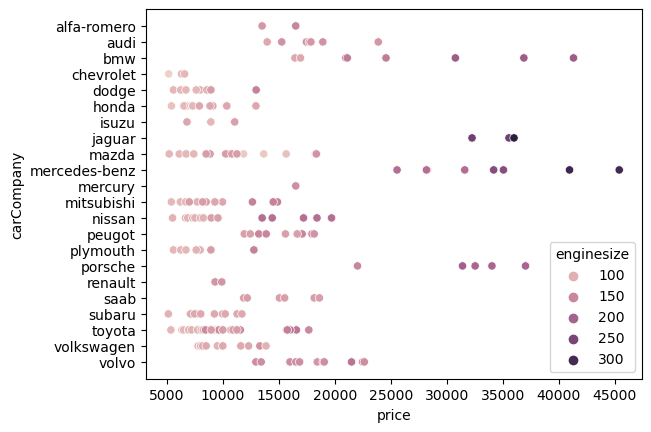

In [125]:
sns.scatterplot(x="price", y="carCompany", data=df, hue="enginesize")

Araba şirketlerinin arabalarının motor boyutlarına göre fiyat değişimi gözlemlenmiştir. Mercedes-benz en yüksek fıyatıyla (45000) en büyük motor boyutuna (300) sahiptir. Aynı şekilde chevrolet ve subaru en düşük enginesize'a (100) sahip olarak en düşük fiyatlandırmayı almışlardır. Bu noktada enginesize değişkeninin price değişkenine büyük ölçüde etki ettiği çıkarımı yapılabilir. Başka bir söylemle 200 enginsize değerine sahip bir araç ortlama olarak 25000 fiyata alınabilir. 

<Axes: xlabel='drivewheel', ylabel='carCompany'>

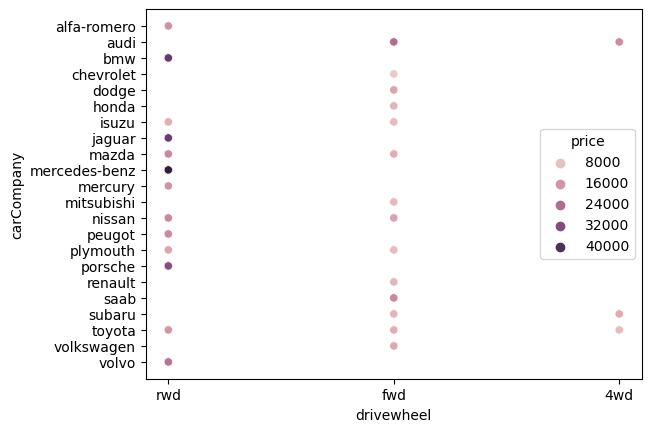

In [123]:
sns.scatterplot(x="drivewheel", y="carCompany", data=df, hue="price")

drivewheel öğresinin araba şirketlerinin fiyatlandırması üzerine dağılımına bakıldığında drivewheel türü rwd olan araçlardan üçü (mercedes-benz, jaguar ve bmw) en yüksek fiyatlandırmaya sahiptir. Başka bir şekilde drivewheel türü 4wd olan araçlardan ikisi en düşük fiyatlandırma olan 8000 fiytına sahiptir. Drivewheel türü fwd olan araçlar ise ortalama 16000-24000 fiyat bandındadır.

<Axes: xlabel='fueltype', ylabel='price'>

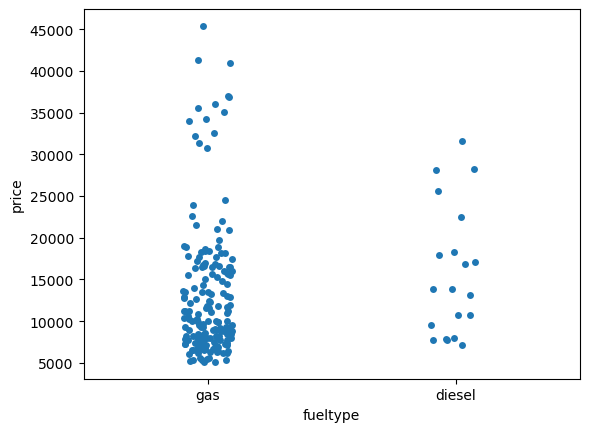

In [127]:
sns.stripplot(x="fueltype", y ="price", data= df)

Fueltype ile price değişkeninin grafiğine baktığımızda fiyatlandırması en yüksek olan aracın gas kullandığı gözlemlenmiştir. Diesel araçlarda en yüksek fiyat 30000 bandında iken gas kullanan araçların diesel kullanan araçlara oranla daha çok olduğunu söylemek mümkünür. 

<Axes: xlabel='fueltype', ylabel='price'>

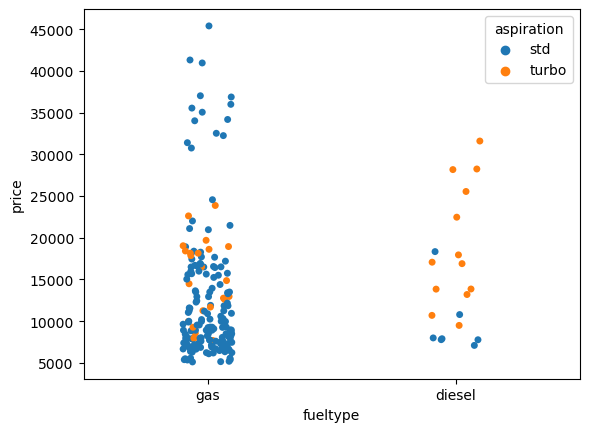

In [140]:
sns.stripplot(x="fueltype", y ="price", data= df, hue= "aspiration")

Fuelstype ile aspiration niteliklerinin price değişkeninin üzerindeki etkisine baktığımızda en yüksek fiyatlı aracın std aspiration özelliğine ve aynı zamanda gas özelliğine sahip olduğu gözlemlenmektedir. Diğer açıdan çoğu diesel aracın turbo aspiration özelliğine sahip olduğunu söylemek mümkündür. 25000 ortalama fiyat altında hem gas kullanan std ve turbo araçlar hem de diesel kullanan std ve turbo araçlar bulunmaktadır.

<Axes: xlabel='fueltype', ylabel='price'>

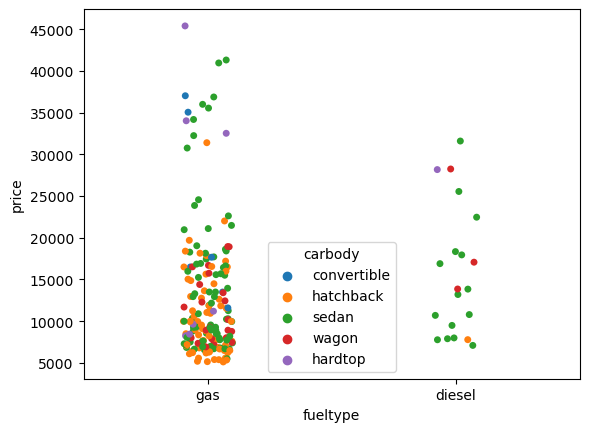

In [141]:
sns.stripplot(x="fueltype", y ="price", data= df, hue= "carbody")

Fueltypei, carbody ve price arasındaki bağlam incelendiğinde en yüksek fiyata sahip olan aracın hardtop tipi carbody özelliğine sahip olduğunu söyleyebiliriz.

<Axes: xlabel='enginelocation', ylabel='price'>

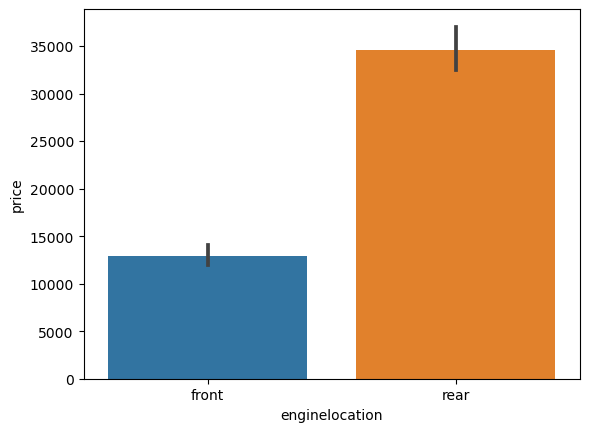

In [142]:
sns.barplot(x ="enginelocation", y="price", data=df)

enginelocation ile price değişkeni arasındaki bağlantıya bakıldığında enginelocation özelliği rear olan araçların fiyat ortalaması büyük oranda daha fazladır. Enginelocation özelliğinin fiyat üstünde etkili bir özellik olduğu söylenebilir. 

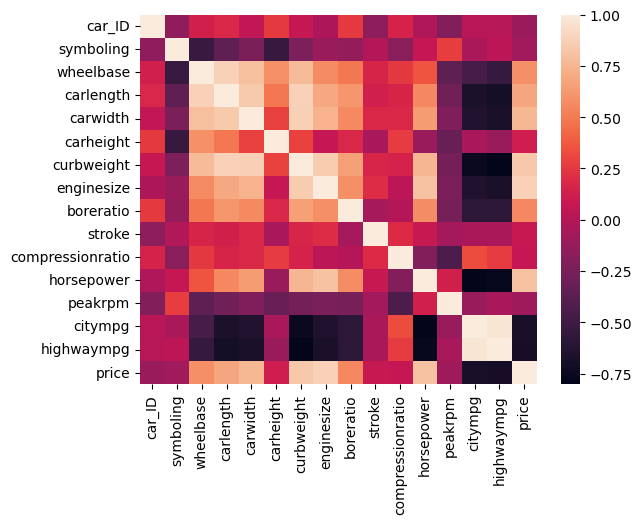

In [90]:
sns.heatmap(df.corr());

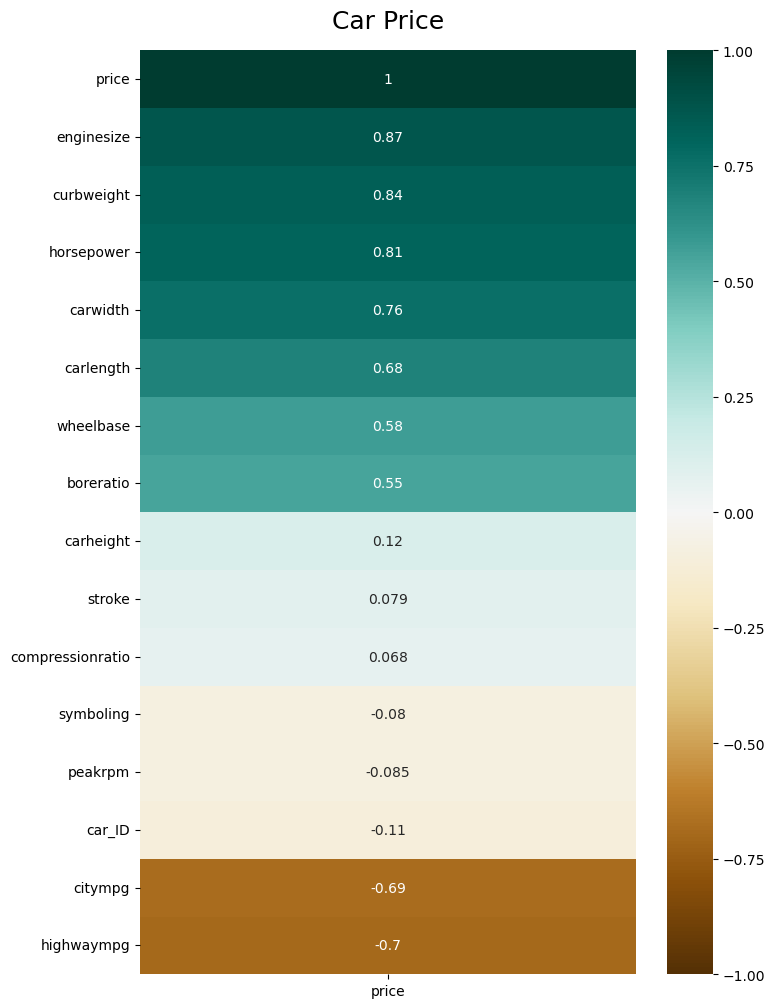

In [91]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Car Price', fontdict={'fontsize':18}, pad=16);

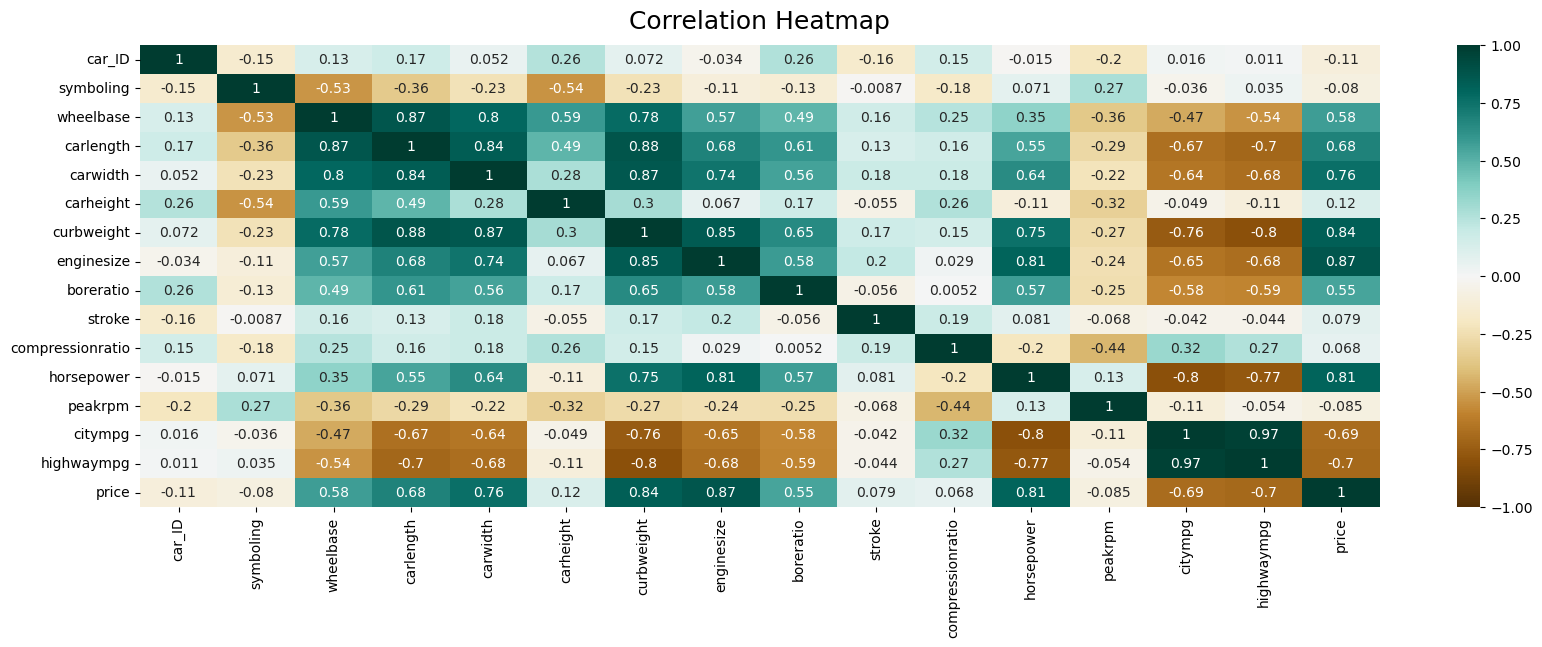

In [145]:
plt.figure(figsize=(20, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

Korelasyon haritasına bakıldığında enginesize, curbweight, horsepower özelliklerinin price değişkenine büyük ölçüde etki ettiğini söylemek mümkündür.

In [11]:
df3.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


In [12]:
df3.drop('car_ID', axis=1, inplace=True)
df3.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


Son adımda veri setinde gereksiz görülen carID drop edilmiştir.